<a href="https://colab.research.google.com/github/RVT123123/traffic_signals_classification/blob/master/traffic_light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
pip install opencv-python

In [0]:
data = []
labels = []
classes = 43
cur_path = "/content/gdrive/My Drive/traffic_light_project"

In [0]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [12]:
len(data)

39226

In [13]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39226, 30, 30, 3) (39226,)


In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31380, 30, 30, 3) (7846, 30, 30, 3) (31380,) (7846,)


In [0]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [16]:
y_train.shape

(31380, 43)

In [0]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)         

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Input, Flatten, Embedding, Conv1D, MaxPooling1D, Concatenate, LSTM, Dropout, Reshape
from keras.models import Model, load_model
import numpy as np
import keras.models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Bidirectional
from keras.layers.normalization import BatchNormalization
import glob

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="traffic.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss' , factor=0.01 , patience=15 , verbose=1 , min_delta=0.00001 , min_lr=0.0001 )
callbacks_list = [checkpoint,reduce_lr]

In [28]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test),verbose = 2,callbacks=callbacks_list)

Train on 31380 samples, validate on 7846 samples
Epoch 1/15
 - 127s - loss: 2.3626 - acc: 0.3960 - val_loss: 1.0451 - val_acc: 0.7076

Epoch 00001: val_acc improved from -inf to 0.70762, saving model to traffic.best.hdf5
Epoch 2/15
 - 127s - loss: 1.1659 - acc: 0.6420 - val_loss: 0.5244 - val_acc: 0.8624

Epoch 00002: val_acc improved from 0.70762 to 0.86235, saving model to traffic.best.hdf5
Epoch 3/15
 - 131s - loss: 0.8490 - acc: 0.7397 - val_loss: 0.4292 - val_acc: 0.8762

Epoch 00003: val_acc improved from 0.86235 to 0.87624, saving model to traffic.best.hdf5
Epoch 4/15
 - 127s - loss: 0.7079 - acc: 0.7863 - val_loss: 0.3069 - val_acc: 0.9175

Epoch 00004: val_acc improved from 0.87624 to 0.91754, saving model to traffic.best.hdf5
Epoch 5/15
 - 127s - loss: 0.6538 - acc: 0.7999 - val_loss: 0.2529 - val_acc: 0.9268

Epoch 00005: val_acc improved from 0.91754 to 0.92684, saving model to traffic.best.hdf5
Epoch 6/15
 - 127s - loss: 0.5896 - acc: 0.8174 - val_loss: 0.2159 - val_acc: 0

In [0]:
model.load_weights("traffic.best.hdf5")

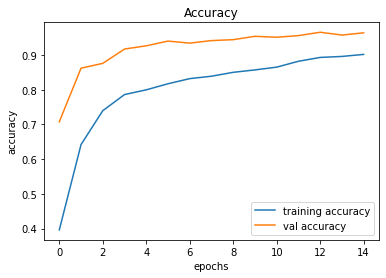

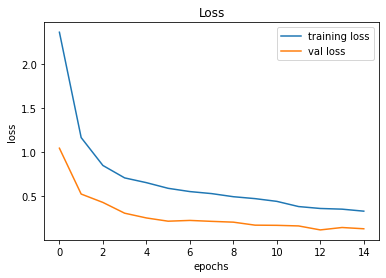

In [30]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('/content/gdrive/My Drive/traffic_light_project/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
full = "/content/gdrive/My Drive/traffic_light_project/"
for img in imgs:
    img = full+img
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [33]:
pred = model.predict_classes(X_test)
#predictong accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
#model.save('traffic_classifier.h5')

0.9220110847189232
